In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data from the CSV file
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Check the size of the dataset
size = data.shape
num_rows = size[0]
num_columns = size[1]
print(size)

(6362620, 11)


In [5]:
# Display basic information about each column
column_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Step 2 data quality, nesse passo estamos identificando valores ausentes em cada coluna e contando as duplicadas no conjunto de dados
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
# Check duplicates
print("Number of duplicated rows:", data.duplicated().sum())

Number of duplicated rows: 0


In [8]:
# Step 4: Data Types
# Determine the data types present in each column, such as numeric, categorical, dates, etc.
print("Data types per column:")
print(data.dtypes)

Data types per column:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [9]:
# Step 5: Statistical Summary
# Calculate descriptive statistics such as mean, median, standard deviation, and quartiles to understand data distribution.
print("Statistical summary for numeric columns:")
print(data.describe())

Statistical summary for numeric columns:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+0

In [10]:
#Calculating the mean by type of transaction
mean_by_type_of_transaction = data.groupby('type')['amount'].mean()

#Print
print(mean_by_type_of_transaction)

type
CASH_IN     168920.242004
CASH_OUT    176273.964346
DEBIT         5483.665314
PAYMENT      13057.604660
TRANSFER    910647.009645
Name: amount, dtype: float64


In [26]:
#Neste código, filtramos as linhas onde a coluna "isFraud" é igual a 1 para obter as operações fraudulentas. Em seguida, usamos o método value_counts() para contar a quantidade de ocorrências de cada tipo de operação. O resultado é a contagem de operações fraudulentas para cada tipo transação.
fraudulent_operations_by_type = data[data['isFraud'] == 1]['type'].value_counts()
print(fraudulent_operations_by_type)

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


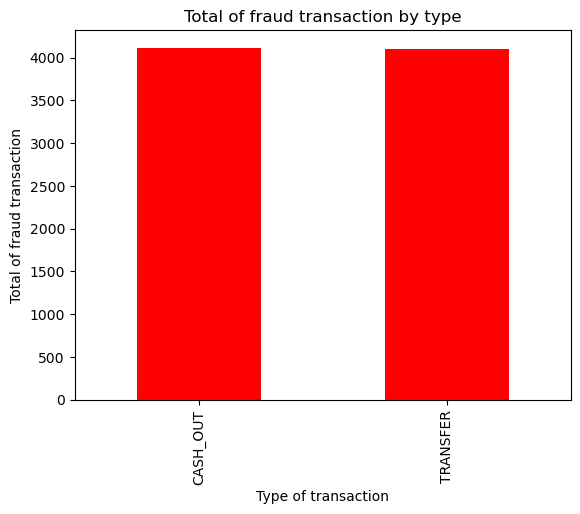

In [13]:
#step 2 method value_count to count fraud transactions by type.
fraudulent_operations = data[data['isFraud'] == 1]
fraudulent_operations_by_type = fraudulent_operations['type'].value_counts()

#step 3 print a bar chart
fraudulent_operations_by_type.plot(kind='bar', color='red')
plt.title('Total of fraud transaction by type')
plt.xlabel('Type of transaction')
plt.ylabel('Total of fraud transaction')

plt.show()

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
#Step2 - Divide the data between source (X) and target (y)
X = data.drop(['isFraud'], axis=1)  # Source, except the column'isFraud'
y = data['isFraud']  # Target = the column 'isFraud'
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [ ]:
#Appying machine learning - decision three to try to identify fraud transactions in this dataset.
#previsores = data.iloc[:,0:10].values
#classe = data.iloc[:,10].values # isFraud

In [20]:
labelencoder1 = LabelEncoder()
X['type'] = labelencoder1.fit_transform(X['type'])

labelencoder3 = LabelEncoder()
X['nameOrig'] = labelencoder3.fit_transform(X['nameOrig'])

labelencoder6 = LabelEncoder()
X['nameDest'] = labelencoder6.fit_transform(X['nameDest'])

In [21]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,0


In [23]:
# Divide the date to train and to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)3

In [24]:
# Create the decision three model
model = DecisionTreeClassifier(random_state=42)

In [25]:
# Training the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Forecast from dataset
y_pred = model.predict(X_test)

# Analysing the result
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy model: {accuracy}')
print('Classification Report:\n', report)

Accuracy model: 0.9997021667174844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.87      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

